# Engdahl Events CSV File Analysis: events, stations, rays  


##  Fei Zhang
### 2018-09-13

In this Jupyter Notebook, we analyze the ENGDAHL seismic events, stations, and rays



In [1]:
!which python

/Softlab/miniconda3/bin/python


In [2]:
!python -V

Python 3.6.5


In [3]:
import pandas as pd
import geopandas as geopd

import matplotlib.pyplot as plt

from IPython.display import display

%matplotlib inline

In [4]:
import sys
# get the pst packages into PYTHONPATH 
sys.path.append("/Softlab/Githubz/passive-seismic")  

#from seismic.cluster.cluster import Grid2 
from seismic.traveltime.sort_rays import sort,sort2

In [7]:
def csv2pdf(csvfile):
    """
    Read in a csv file into a pandas dataframe. 
    Make sure the column names match the csv files. 
    delimiter/separator is whitespace or comma
    """
   
   
    
    # read infile, tweek below
    in_pdf =  pd.read_csv(csvfile, header='infer')   #  assume there is header line=0; separator = comma,
    # finalpdf =  pd.read_csv(csvfile, header=None,  names=col_names ) #  no header line, separator = comma,
    #finalpdf =  pd.read_csv(csvfile,  sep='\s+', header=None,  names=col_names) # white space
  
    # columns you are interested?
    col_names=['source_block', 'station_block', 'residual', 'event_number', 
            'source_longitude','source_latitude','source_depth',  
            'station_longitude','station_latitude', 'observed_tt', 'locations2degrees', 'station_code','SNR', 'P_or_S']   
    
    # finalpdf = in_pdf[col_names]  # take a subset of columns
    
    return in_pdf  #pandas_data_frame

In [9]:
# OR read in from already sorted (zoned) csv file
inputcsv ='/g/data/ha3/Passive/Events/engdahl-events_2csv/outfile_S.csv'
inputcsv ='/Softlab/travel_time_tomography/CSV_Data/engdahl/outfile_S.csv'
inputpdf = csv2pdf(inputcsv)

In [10]:
inputpdf.shape

(143436, 18)

In [11]:
inputpdf.head()

,source_block,station_block,residual,event_number,source_longitude,source_latitude,source_depth,station_longitude,station_latitude,observed_tt,ARRIVAL_TIME,ORIGIN_TIME,ELLIPTICITY_CORR,locations2degrees,ARRIVAL_DISTANCE,station_code,SNR,P_or_S
0,0,-1,16.99,1188758329,166.201,-11.763,16300.0,-149.5760,-17.56740,882.872692,2007-09-02T18:53:33.000100Z,2007-09-02T18:38:49.000340Z,-1.127068,43.080675,43.10,PPT,0.0,2
1,0,-1,0.93,1180153258,120.295,-7.129,590700.0,119.7517,-5.01420,135.034949,2007-05-26T04:23:13.000740Z,2007-05-26T04:20:58.000320Z,0.034529,2.182709,2.17,KAPI,0.0,2
2,0,-1,0.93,1180153258,120.295,-7.129,590700.0,119.7517,-5.01420,135.034949,2007-05-26T04:23:13.000740Z,2007-05-26T04:20:58.000320Z,0.034529,2.182709,2.17,KAPI,0.0,2
3,0,-1,-2.99,1180153258,120.295,-7.129,590700.0,123.7000,-10.19990,157.900654,2007-05-26T04:23:36.000480Z,2007-05-26T04:20:58.000320Z,-0.099506,4.556133,4.54,BWTI,0.0,2
4,0,-1,-4.20,1180153258,120.295,-7.129,590700.0,125.6403,-18.09826,285.421269,2007-05-26T04:25:44.000800Z,2007-05-26T04:20:58.000320Z,-0.579211,12.142393,12.09,FITZ,0.0,2


In [12]:
inputpdf.columns


Index(['source_block', 'station_block', 'residual', 'event_number',
       'source_longitude', 'source_latitude', 'source_depth',
       'station_longitude', 'station_latitude', 'observed_tt', 'ARRIVAL_TIME',
       'ORIGIN_TIME', 'ELLIPTICITY_CORR', 'locations2degrees',
       'ARRIVAL_DISTANCE', 'station_code', 'SNR', 'P_or_S'],
      dtype='object')

In [10]:
# write out ?
# finalpdf.to_csv('/g/data/ha3/Passive/Events/engdahl-events_2csv/outfile_P2.csv', header=True, index=False, sep=',')

In [ ]:
stop

In [11]:
# P wave
#inputcsv='/g/data/ha3/fxz547/Githubz/passive-seismic/seismic_events_arrivals_P_0.csv'
#inputcsv='/g/data/ha3/fxz547/Githubz/passive-seismic/tempworks/outfile_P.csv'
inputcsv='/g/data/ha3/fxz547/travel_time_tomography/CSV_NewFormatAug10/FZ01-pst-cluster2/run3/P_out.csv'
inputcsv ='/g/data/ha3/Passive/Events/engdahl-events_2csv/outfile_P2.csv'
#inputcsv='/Softlab/travel_time_tomography/PST/CSV_New_FZ01-pst-cluster2_run3/P_out.csv'
residual_cutoff=5.0  # cutoff value for P is 5s
sortedfile='sortedfile_P.csv'
sortedfile2= 'sortedfile2_P.csv'



#S wave
#inputcsv='/g/data1a/ha3/fxz547/travel_time_tomography/run5_events_1deg/outfile_S.csv'
# inputcsv='/g/data/ha3/fxz547/travel_time_tomography/CSV_NewFormatAug10/FZ01-pst-cluster2/run3/S_out.csv'
# residual_cutoff=10.0
# sortedfile='sortedfile_S.csv'
# sortedfile2= 'sortedfile2_S.csv'

sorted_pdf = sort(inputcsv,sortedfile,residual_cutoff)   # select the median travel time

#sort again should get identical rows. ALL reduced to a minimum set
#pdf2=sort2(sortedfile, sortedfile2, residual_cutoff )

In [13]:
# columns you are interested?
col_names=['source_block', 'station_block', 'residual', 'event_number', 
        'source_longitude','source_latitude','source_depth',  
        'station_longitude','station_latitude', 'observed_tt', 'locations2degrees', 'station_code','SNR', 'P_or_S']   


In [16]:
# define a pdf to be analyzed and visulaized further

pdf2=inputpdf[col_names]  # sorted_pdf

In [17]:
pdf2.shape

(143436, 14)

In [18]:
pdf2.source_block.nunique()  # number of unique values

1

In [19]:
pdf2.station_block.nunique()

1

In [20]:
pdf2.station_code.nunique()

1918

In [21]:
pdf2.groupby(['station_block','station_code']).count().shape

(1918, 12)

# Begin to Visualize the data

In [22]:
#  which dataframe to view in the following??
pdf2= inputpdf  #sorted_pdf

In [20]:
# plt.figure(); pdf2.plot(x='event_number', y='observed_tt')
# plt.figure(); pdf2.plot(x='event_number', y='source_depth')
# plt.figure(); pdf2.plot(x='event_number', y='locations2degrees')

# plt.figure(); pdf2.plot.scatter(x='event_number', y='residual',figsize=(12,8))  # less than +-10s

In [21]:
# plt.figure(); pdf2.plot.scatter(x='event_number', y='source_block',figsize=(12,8))

In [22]:
# plt.figure(); pdf2.plot.scatter(x='source_block', y='station_block',figsize=(12,8))

# 1. Python Pandas package plot function (with basemap) 

<Figure size 432x288 with 0 Axes>

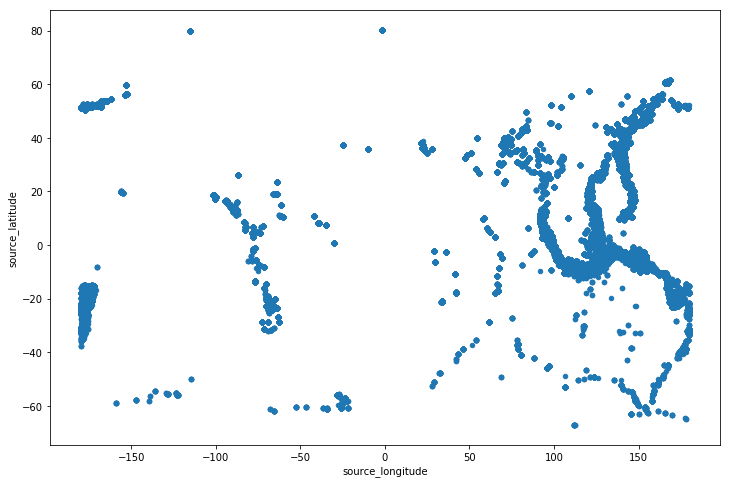

In [23]:
plt.figure(); pdf2.plot.scatter(x='source_longitude', y='source_latitude',figsize=(12,8))

<Figure size 432x288 with 0 Axes>

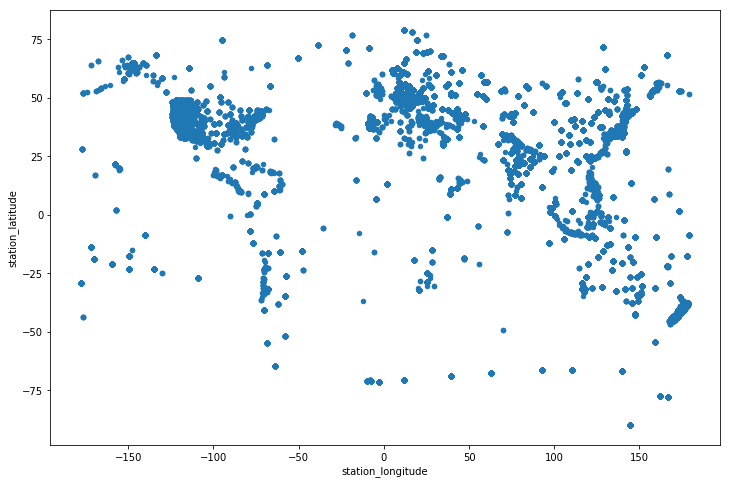

In [24]:
plt.figure(); pdf2.plot.scatter(x='station_longitude', y='station_latitude',figsize=(12,8))

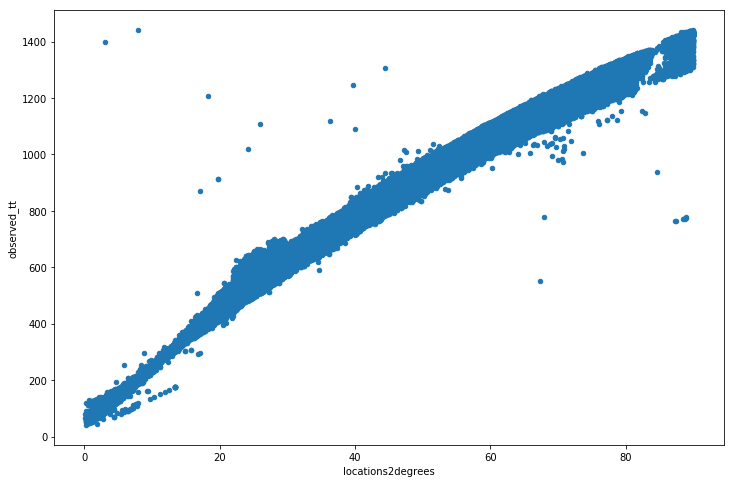

In [25]:
#plt.figure(); 
pdf2.plot.scatter(x='locations2degrees', y='observed_tt',figsize=(12,8))


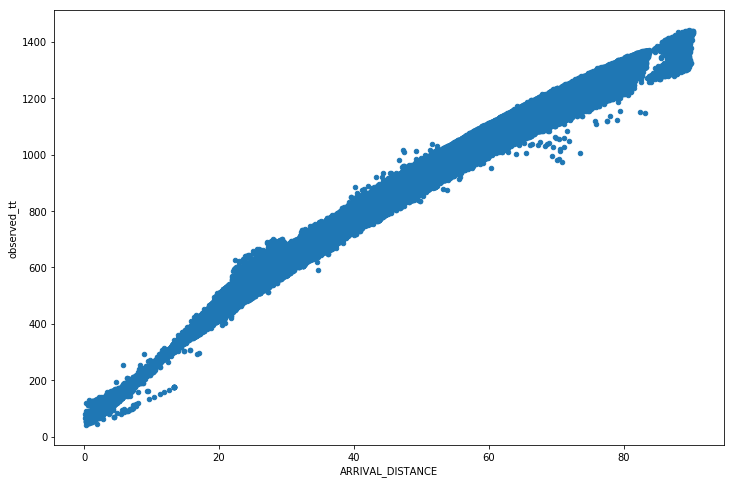

In [26]:
pdf2.plot.scatter(x='ARRIVAL_DISTANCE', y='observed_tt',figsize=(12,8))

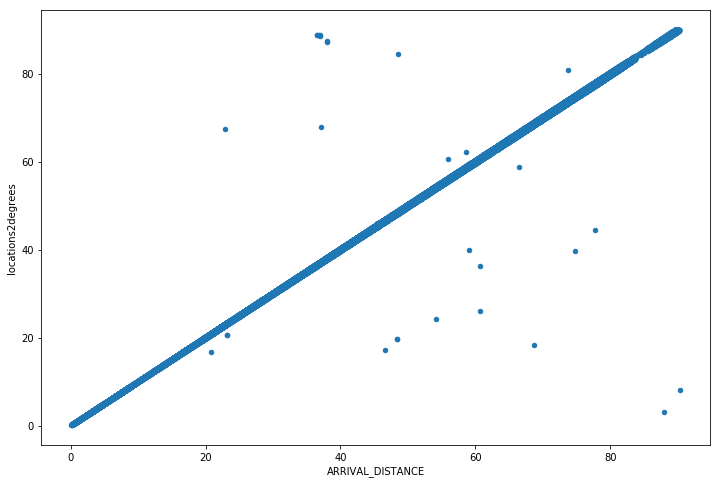

In [27]:
pdf2.plot.scatter(x='ARRIVAL_DISTANCE', y='locations2degrees',figsize=(12,8))

In [28]:
station_issues=pdf2[abs(pdf2['ARRIVAL_DISTANCE'] - pdf2['locations2degrees'])>1]

In [29]:
station_issues.head()

,source_block,station_block,residual,event_number,source_longitude,source_latitude,source_depth,station_longitude,station_latitude,observed_tt,ARRIVAL_TIME,ORIGIN_TIME,ELLIPTICITY_CORR,locations2degrees,ARRIVAL_DISTANCE,station_code,SNR,P_or_S
738,0,-1,0.29,1160932065,-156.049,19.891,5000.0,-85.7301,10.9009,777.363380,2006-10-15T17:20:43.000680Z,2006-10-15T17:07:45.000050Z,-0.637250,67.955927,37.06,MURC,0.0,2
1430,0,-1,2.33,1183451160,-30.287,0.738,10000.0,-91.6949,14.5246,1083.045413,2007-07-03T08:44:04.000890Z,2007-07-03T08:26:00.000490Z,-0.954987,62.194759,58.61,RETA,0.0,2
4716,0,-1,-20.12,1216435649,142.476,37.560,30100.0,-84.6170,44.8234,763.628103,2008-07-19T03:00:13.000960Z,2008-07-19T02:47:29.000050Z,-0.372807,87.310475,38.03,GLMI,0.0,2
22988,0,-1,3.61,1187221257,-76.635,-13.401,41200.0,-83.8240,9.7829,1019.140380,2007-08-15T23:57:57.000600Z,2007-08-15T23:40:57.000880Z,-0.859340,24.257260,54.19,PAL,0.0,2
25242,0,-1,0.89,1211571334,-34.905,7.363,10000.0,-74.9013,3.6953,1088.857668,2008-05-23T19:53:44.000000Z,2008-05-23T19:35:34.000980Z,-1.141352,39.963932,59.08,PRA,0.0,2


In [30]:
station_issues.shape

(29, 18)

In [31]:
station_issues.station_code.unique()
#Pwave: array(['MURC', 'PAL', 'CHIE', 'PRA', 'RETA', 'TAM', 'SVST', 'EGUA','VIMO', 'GLMI', 'YURE', 'MON', 'MPG', 'ALIB'], dtype=object)

array(['MURC', 'RETA', 'GLMI', 'PAL', 'PRA', 'ALIB'], dtype=object)

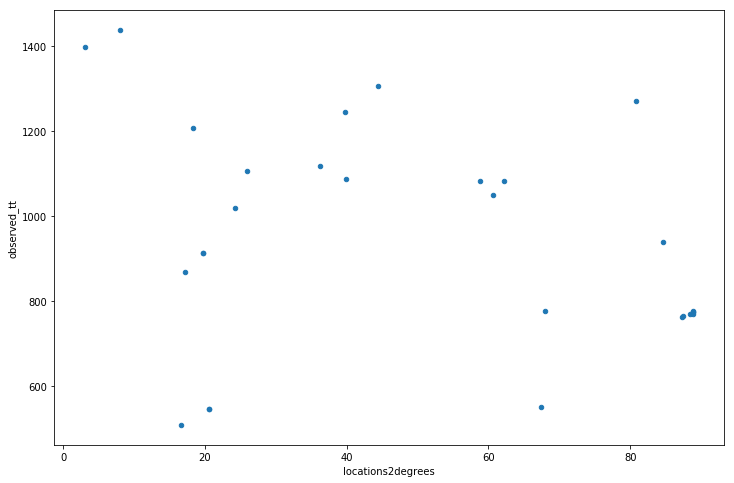

In [32]:
station_issues.plot.scatter(x='locations2degrees', y='observed_tt',figsize=(12,8))

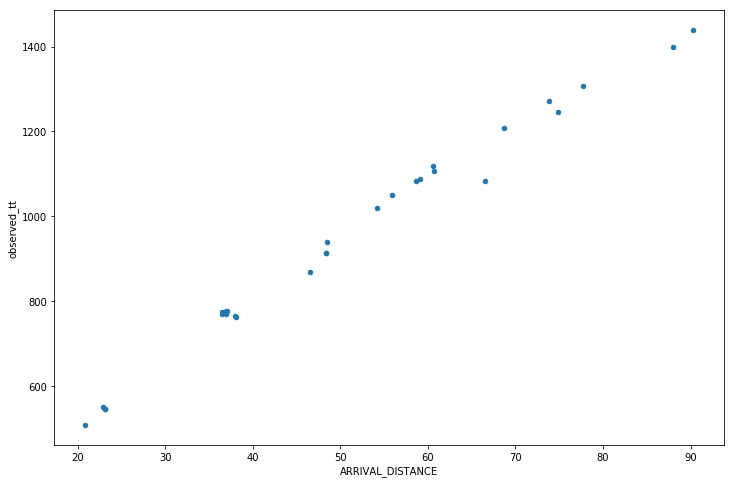

In [33]:
station_issues.plot.scatter(x='ARRIVAL_DISTANCE', y='observed_tt',figsize=(12,8))

In [35]:
# save csv file
#station_issues.drop(columns=['geometry']).to_csv("problem_stations",header=True, index=False, sep=',')

# 3. Geopandas and Maps

In [34]:
import geopandas as gpd

In [35]:
from shapely.geometry import mapping
from shapely.geometry import Point
from shapely.geometry import Point, Polygon, LineString, LinearRing

In [36]:
event_locations = [Point(xy) for xy in zip(pdf2.source_longitude, pdf2.source_latitude)]
#OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
#if you want to df = df.drop(['Lon', 'Lat'], axis=1)
mycrs = {'init': 'epsg:4326'}  # WGS84
mycrs = {'init': 'epsg:4283'}  # GDA94
geopdf = gpd.GeoDataFrame(pdf2, crs=mycrs, geometry=event_locations)

In [37]:
# myax = geopdf.plot(figsize=[20,10])


# myax.set_xlabel('Longitude')
# myax.set_ylabel('Latitude+
# title_str= "event locations"
# myax.set_title(title_str)

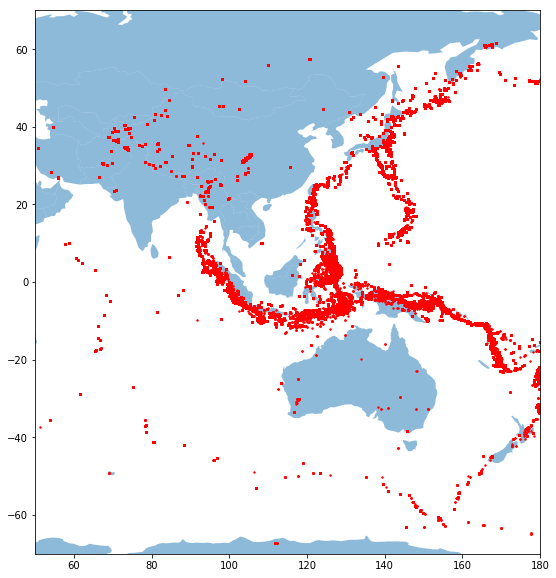

In [38]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
myax=world.plot(alpha=0.5,  figsize=(20, 10))

myax.set_xlim([50,180])
myax.set_ylim([-70,70])
              
geopdf.plot(ax=myax, marker='o', color='red', markersize=2);

In [39]:
Stop here

SyntaxError: invalid syntax (<ipython-input-39-bc113f3dc93b>, line 1)

# Plot Arrival Rays

In [40]:
mycrs = {'init': 'epsg:4326'}  # WGS84

#geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)

pdf2['ray']= pdf2.apply(lambda x: LineString([(x.source_longitude, x.source_latitude), 
                (x.station_longitude, x.station_latitude)]), axis=1)


geopdf_ray = gpd.GeoDataFrame(pdf2, crs=mycrs, geometry='ray')

In [41]:
# myax=geopdf_ray.plot(figsize=[20,10])

# myax.set_xlabel('Longitude')
# myax.set_ylabel('Latitude')
# title_str= "event->station Rays"
# myax.set_title(title_str)

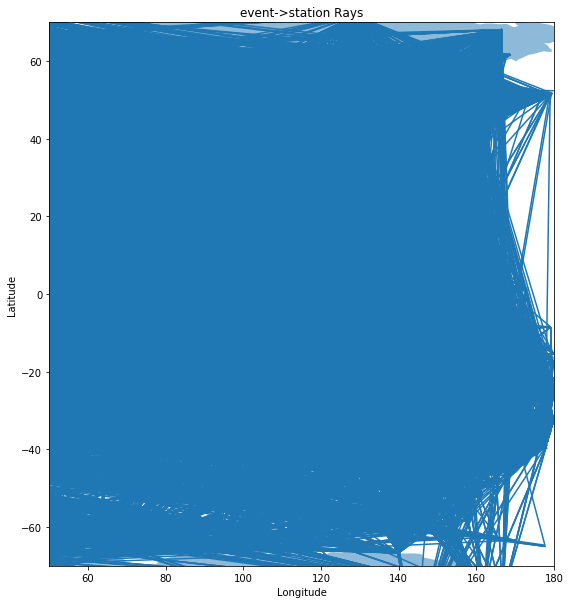

In [42]:
# geopandas included shape datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mymap=world.plot(alpha=0.5,  figsize=(20, 10))

# mymap.set_xlim([-180,180])
# mymap.set_ylim([-80,80])

mymap.set_xlim([50,180])
mymap.set_ylim([-70,70])

mymap.set_xlabel('Longitude')
mymap.set_ylabel('Latitude')
title_str= "event->station Rays"
mymap.set_title(title_str)

geopdf_ray.plot(ax=mymap)

In [45]:
break

SyntaxError: 'break' outside loop (<ipython-input-45-6aaf1f276005>, line 1)

In [44]:
#pdf3=pd.read_csv('/g/data/ha3/fxz547/travel_time_tomography/CSV_NewFormatAug10/FZ01-pst-cluster2/run3/P_out_translated.csv', header='infer')


In [ ]:
pdf3.head()

In [ ]:
pdf3.plot.scatter(x='source_xc', y='source_yc', figsize=(12, 8))


In [ ]:
pdf3.source_zc.unique().size

In [ ]:
type(depth)

# Other Things

In [ ]:
x=124.6; y=-0.0891; z=2353.8

In [ ]:
i=round(x/0.25)+1; print (i)

In [ ]:
print (i)

In [ ]:
j=round((90-y)/0.25) +1; print (j)